In [2]:
from drop_lib2 import *
from scipy.io import loadmat
import pickle
from sktime.classification.interval_based import RandomIntervalSpectralEnsemble

directory = 'rise'
verbose = 1
data = load_data(verbose=verbose)

Loaded segments shape: (842, 25000)
Speed labels shape: (842,)
Volume labels shape: (842,)
Unique speeds: [1.72 2.08 2.36 2.64 3.13 3.39 3.42]
Unique volumes: [55 77]


 20%|██        | 1/5 [11:04<44:18, 664.59s/it]

Velocity accuracy (fold): 0.9941


 40%|████      | 2/5 [22:02<33:02, 660.75s/it]

Velocity accuracy (fold): 0.9941


 60%|██████    | 3/5 [32:59<21:57, 658.79s/it]

Velocity accuracy (fold): 1.0000


 80%|████████  | 4/5 [43:49<10:55, 655.43s/it]

Velocity accuracy (fold): 0.9940


100%|██████████| 5/5 [55:08<00:00, 661.70s/it]


Velocity accuracy (fold): 0.9940
Velocity accuracy average across all folds: 0.9953±0.0024


 20%|██        | 1/5 [12:13<48:53, 733.39s/it]

Volume accuracy (fold): 0.9172


 40%|████      | 2/5 [24:27<36:41, 733.72s/it]

Volume accuracy (fold): 0.9172


 60%|██████    | 3/5 [35:57<23:47, 713.78s/it]

Volume accuracy (fold): 0.9345


 80%|████████  | 4/5 [47:50<11:53, 713.50s/it]

Volume accuracy (fold): 0.9405


100%|██████████| 5/5 [1:00:04<00:00, 720.93s/it]

Volume accuracy (fold): 0.9107
Volume accuracy average across all folds - : 0.9240±0.0114
Results saved in directory: ./rise/
[[103   0   0   0   0   0   0]
 [  0 122   0   0   0   0   0]
 [  0   0 113   0   0   0   0]
 [  0   0   0 182   0   0   0]
 [  0   0   0   0  88   0   0]
 [  0   0   0   4   0 138   0]
 [  0   0   0   0   0   0  92]]
[[327  42]
 [ 22 451]]


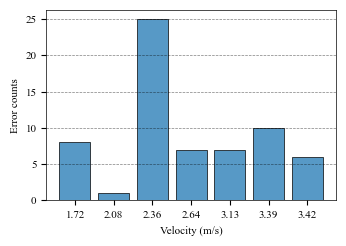

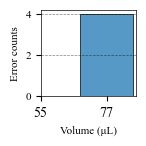

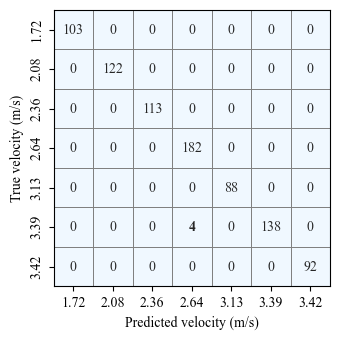

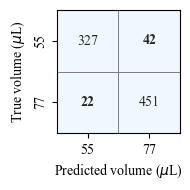

In [3]:
rise_classifier = RandomIntervalSpectralEnsemble(
    n_estimators=750,
    n_jobs=7)
X = data['segments']
confusion_matrices_speed, error_indices_speed, all_cv_scores_speed, \
confusion_matrices_volume, error_indices_volume, all_cv_scores_volume\
    = evaluate_classifier(rise_classifier, rise_classifier, X, data, random_state=42)
save_results(confusion_matrices_speed, error_indices_speed, all_cv_scores_speed,
             confusion_matrices_volume, error_indices_volume, all_cv_scores_volume,
             data,
             directory=directory, verbose=verbose)
plot_results(confusion_matrices_speed, error_indices_speed,
             confusion_matrices_volume, error_indices_volume,
             data,
             directory=directory, verbose=verbose)